<a href="https://colab.research.google.com/github/Asterisk07/BTP-Transformer-explainability/blob/main/vision_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vision Transformers from scratch

- [ViT Blogpost by Francesco Zuppichini](https://towardsdatascience.com/implementing-visualttransformer-in-pytorch-184f9f16f632)
- [D2L Tutorial ](https://d2l.ai/chapter_attention-mechanisms-and-transformers/vision-transformer.html)
- [Brian Pulfer Medium Blogpost](https://medium.com/mlearning-ai/vision-transformers-from-scratch-pytorch-a-step-by-step-guide-96c3313c2e0c)
- [Lucidrains implementation Github ](https://github.com/lucidrains/vit-pytorch/blob/main/vit_pytorch/vit.py)

## Setup

In [7]:
# !pip install einops
!pip install transformers


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [8]:
import cv2
import numpy as np

## Image Patching



In [9]:
import torch

In [10]:

from torchvision.datasets import OxfordIIITPet
import matplotlib.pyplot as plt
from random import random
from torchvision.transforms import Resize, ToTensor
from torchvision.transforms.functional import to_pil_image

to_tensor = [Resize((144, 144)), ToTensor()]

class Compose(object):
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, image, target):
        for t in self.transforms:
            image = t(image)
        return image, target

def preview_dataset(images, num_samples=40, cols=8):
    """ Plots some samples from the dataset """
    plt.figure(figsize=(15,15))
    idx = int(len(dataset) / num_samples)
    print(images)
    for i, img in enumerate(images):
        if i % idx == 0:
            plt.subplot(int(num_samples/cols) + 1, cols, int(i/idx) + 1)
            plt.imshow(to_pil_image(img[0]))

# 200 images for each pet
dataset = OxfordIIITPet(root=".", download=True, transforms=Compose(to_tensor))
print("Dataset fetched")
# preview_dataset(dataset)

Dataset fetched


In [11]:
# type(img) is torch.Tensor
SCALE = 0.5

In [12]:
def show_images(images, figsize = (15, 5), scale_factor = 1,titles=None):
    '''handles both tensors and images'''
    num_images = len(images)
    
    # Create a figure and set of subplots
    fig, axes = plt.subplots(1, num_images, figsize=np.array(figsize) * scale_factor)
    
    # Ensure axes is an array, even for a single image
    if num_images == 1:
        axes = [axes]
    
    # Display each image in a subplot
    for ax, img, title in zip(axes, images, titles or ['']*num_images):
        if type(img)  is torch.Tensor:
            img = img.permute(1, 2, 0).numpy()
        # Convert color images from BGR to RGB
        # if img.ndim == 3 and img.shape[2] == 3:
        #     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img, cmap='gray' if len(img.shape) == 2 or img.shape[-1] == 1 else None)
        ax.axis('off')  # Hide axis

        ax.set_title(title.title())  # Set the title for the subplot

    plt.show()
# show_images(images = [new_dataset[0][0]] ,scale_factor = SCALE,titles = ['color_img'])

In [13]:
from tqdm import tqdm


In [14]:
type(dataset)

torchvision.datasets.oxford_iiit_pet.OxfordIIITPet

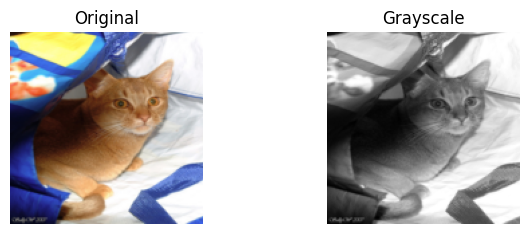

In [15]:
'''EDA : black and white'''
idx = 0
SCALE = 0.5

# ------------
img = dataset[idx][0]
# img = new_dataset[idx][0]
image_np = img.permute(1, 2, 0).numpy()
# Convert to NumPy array and transpose to (H, W, C)

gray_image = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)[:, :, np.newaxis] if image_np.shape[2] == 3 else image_np

# SCALE = 75/100

show_images(images = [img, gray_image,] ,scale_factor = SCALE,titles = ['original', 'grayscale'])
# show_images(images = [grey_image, bw_image, x,] ,scale_factor = SCALE,titles = ['Greyscale','B/W','One color per row'])

In [16]:
old_dataset = dataset

In [17]:
new_dataset = list()

In [18]:
from tqdm import tqdm

In [19]:
# changing labels
import gzip
import pickle
with gzip.open('classes.gz', 'rb') as f:
    loaded_labels = pickle.load(f)

In [20]:
# loaded_labels

In [21]:
'''preprocessing : black and white'''
new_dataset= list()
class_idx = -1
for idx in tqdm(range(len(dataset))):
    if (idx%50==0):
        class_idx = idx
    img = dataset[idx][0]
    image_np = img.permute(1, 2, 0).numpy()
    # Convert to NumPy array and transpose to (H, W, C)

    # image_np = (image_np * 255).astype(np.uint8)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)[:, :, np.newaxis]
    grey_tensor = torch.from_numpy(gray_image).permute(2,0,1)
    # Convert to convert to (1,H,W)

    
    # label = dataset[k][1]
    # label = dataset[idx][1]
    
    try:
        label = loaded_labels[class_idx]
    except:
        print(class_idx, "is error")
        raise zero
    new_dataset.append((grey_tensor,label))
print(len(new_dataset)) 
    


100%|██████████| 3680/3680 [00:17<00:00, 206.51it/s]

3680


### EDA : Verifying classes 

In [22]:
raise InterruptedError

InterruptedError: 

image idx  0


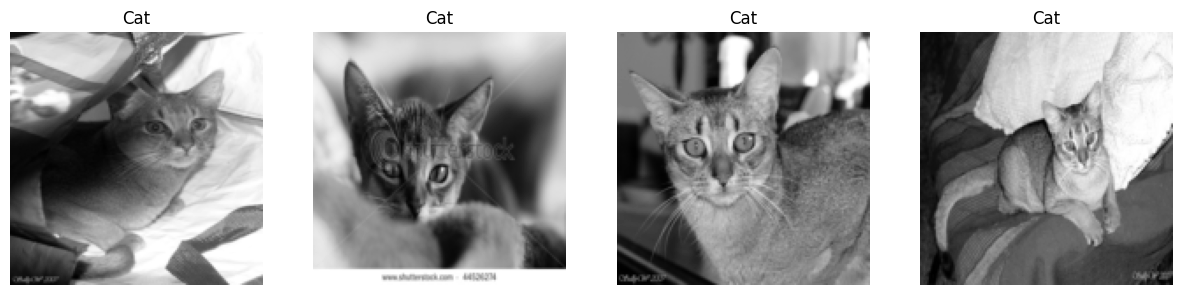

image idx  50


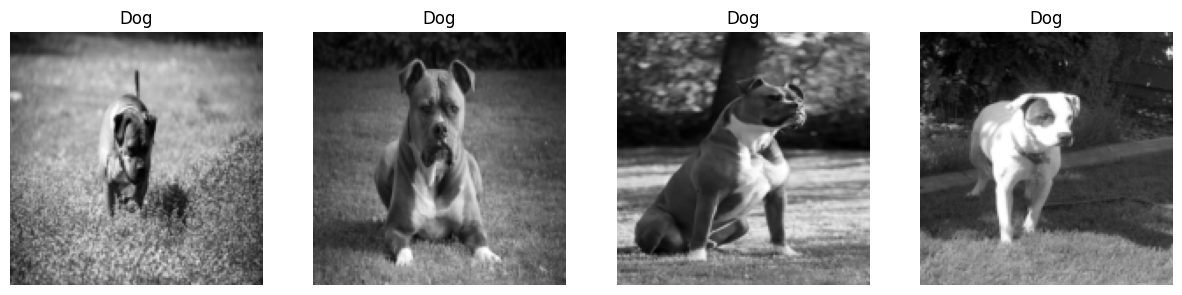

image idx  100


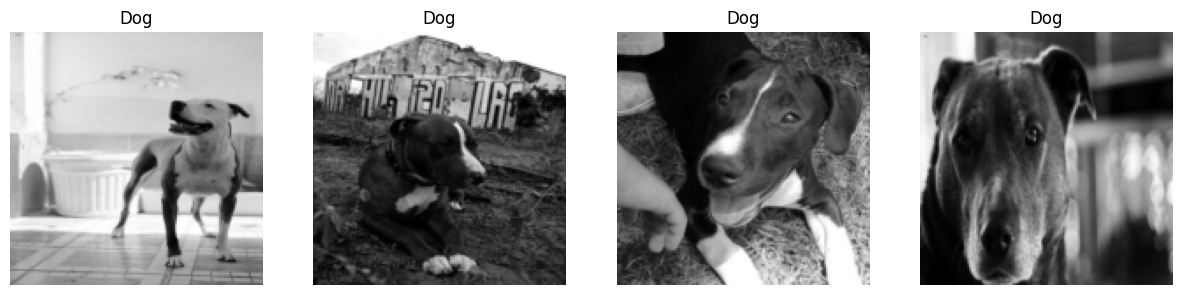

image idx  150


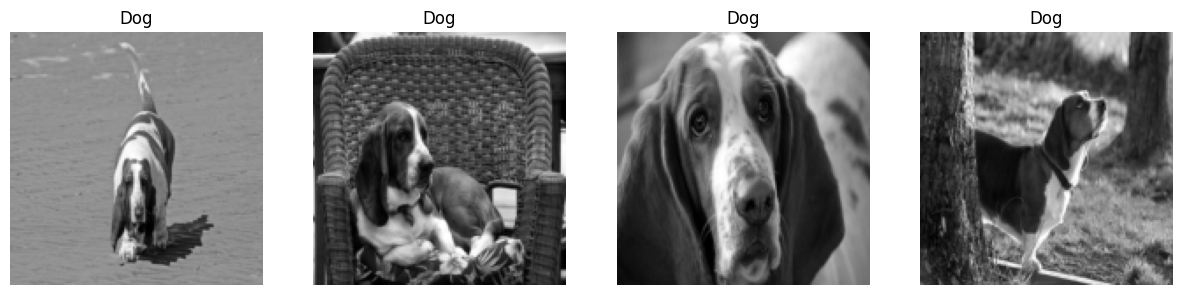

image idx  200


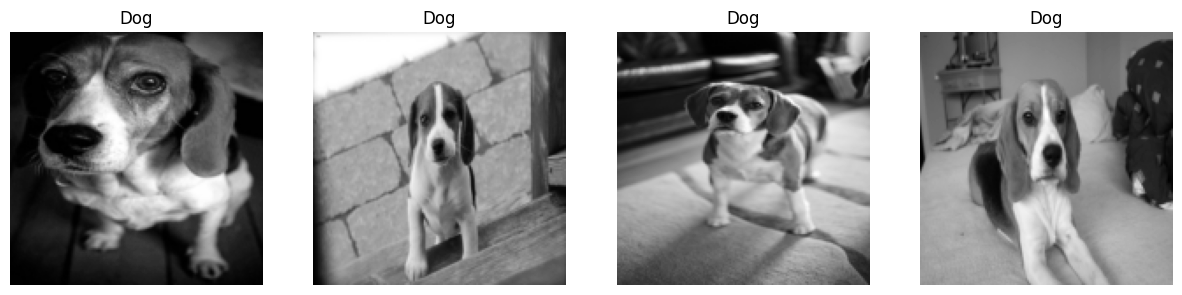

image idx  250


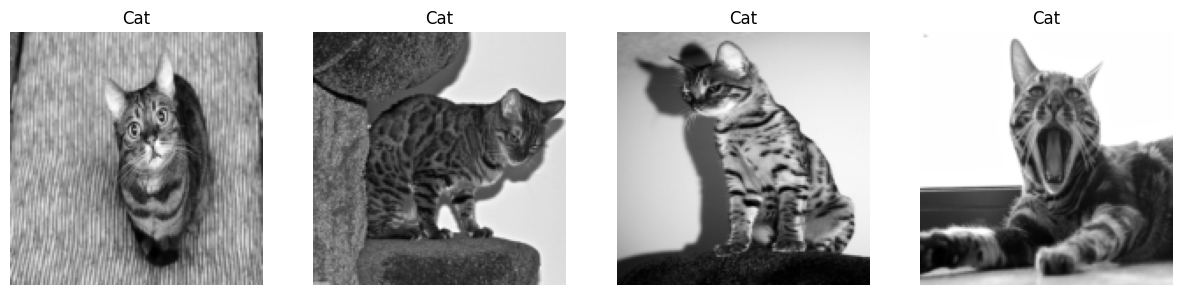

image idx  300


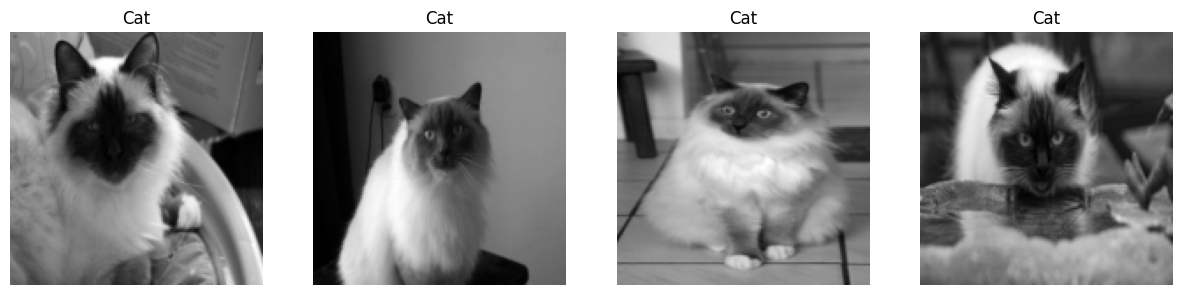

image idx  350


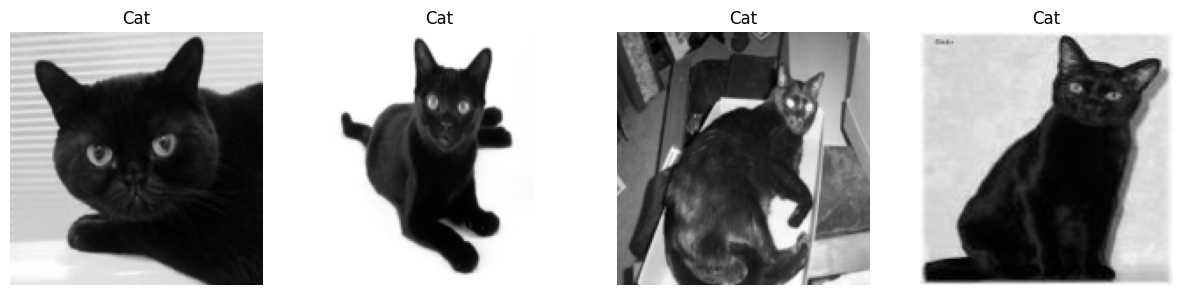

image idx  400


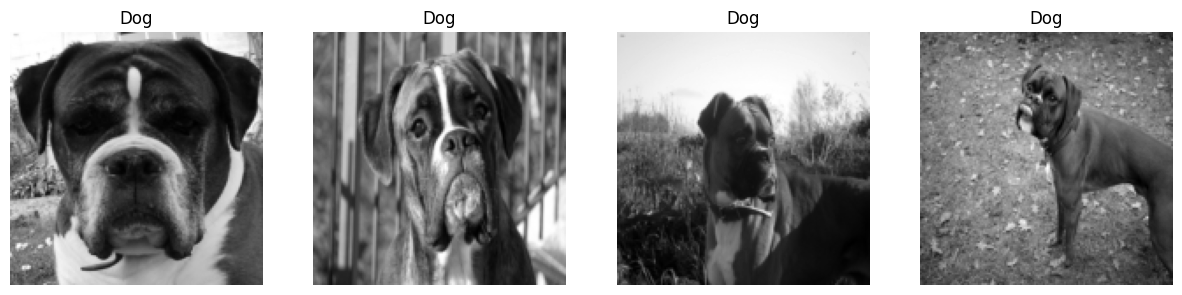

image idx  450


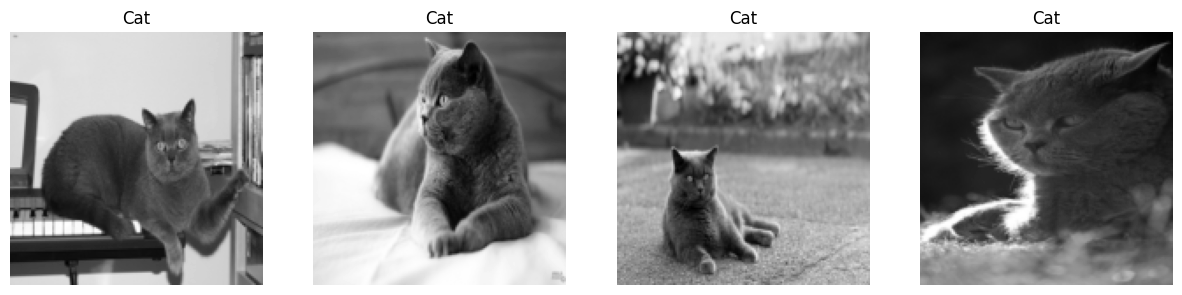

image idx  500


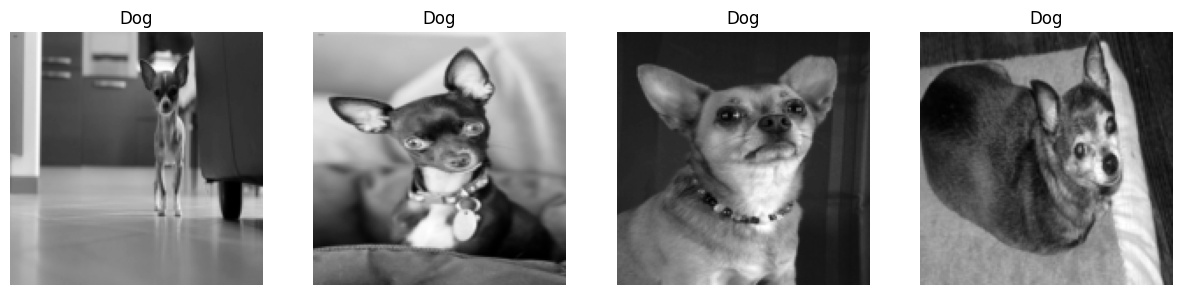

image idx  550


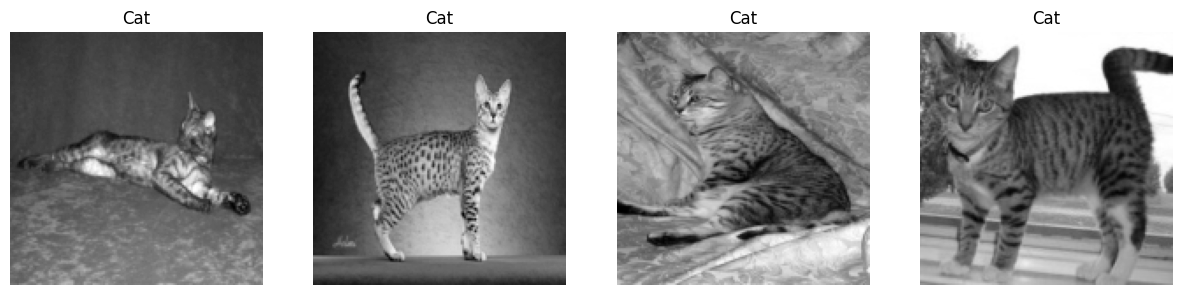

image idx  600


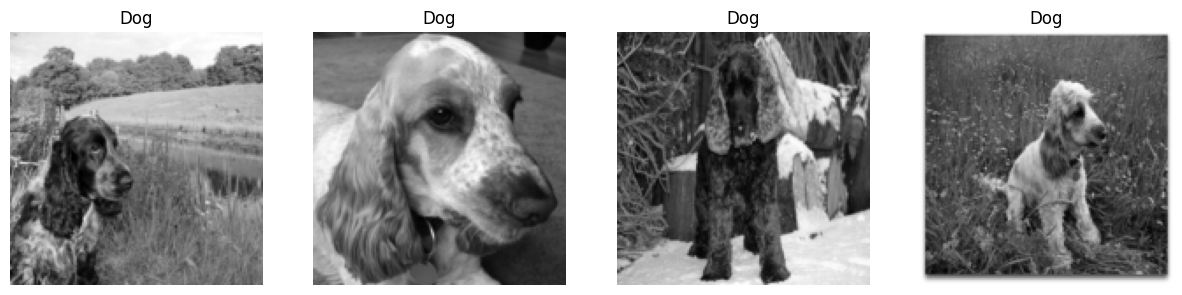

image idx  650


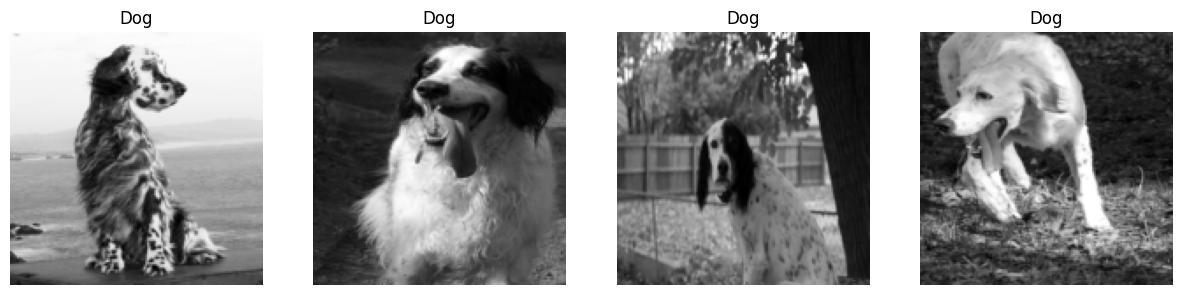

image idx  700


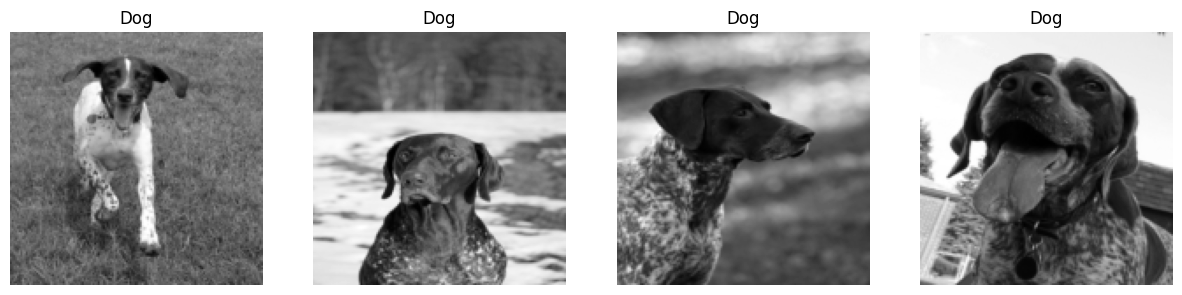

image idx  750


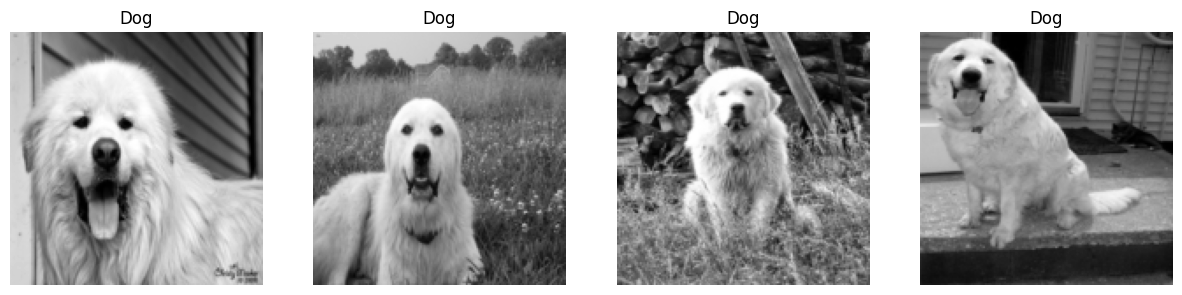

image idx  800


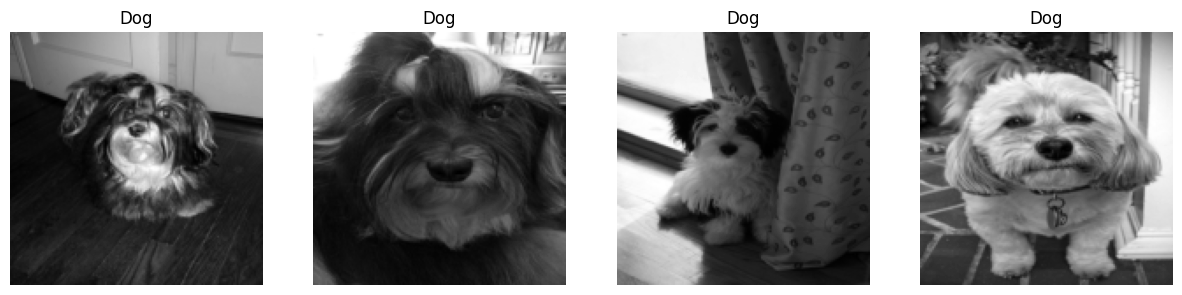

image idx  850


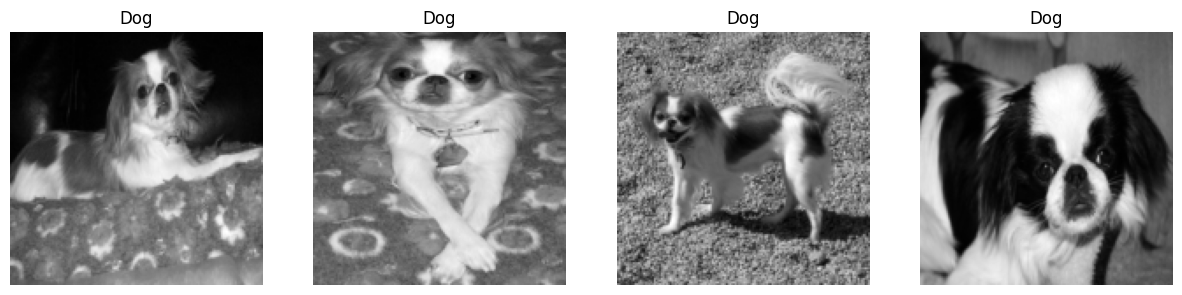

image idx  900


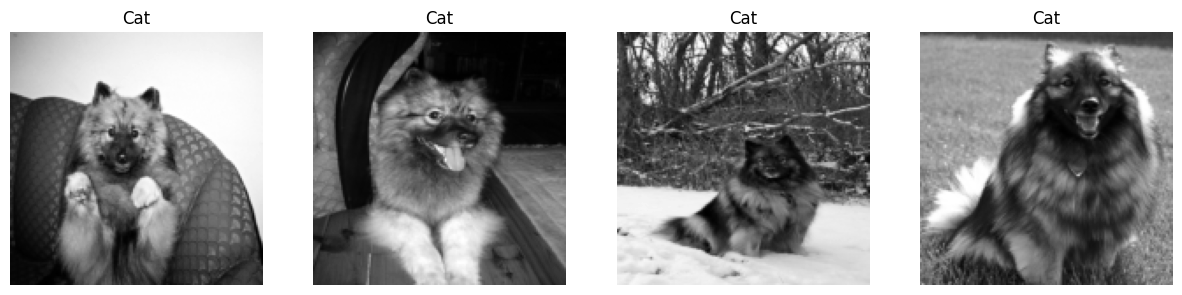

image idx  950


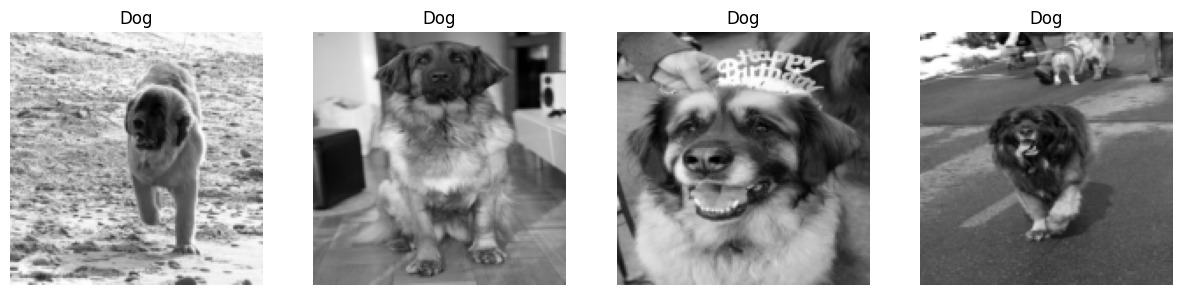

image idx  1000


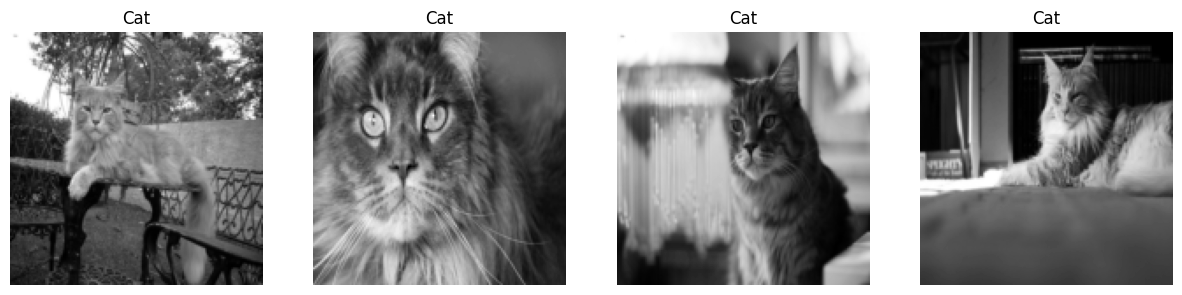

image idx  1050


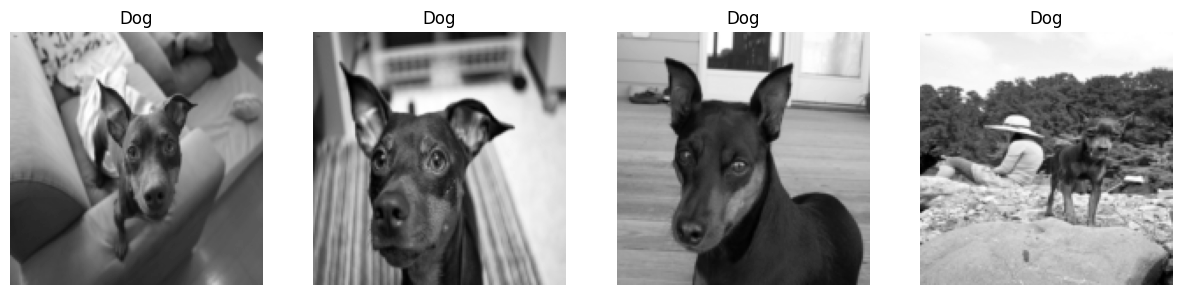

image idx  1100


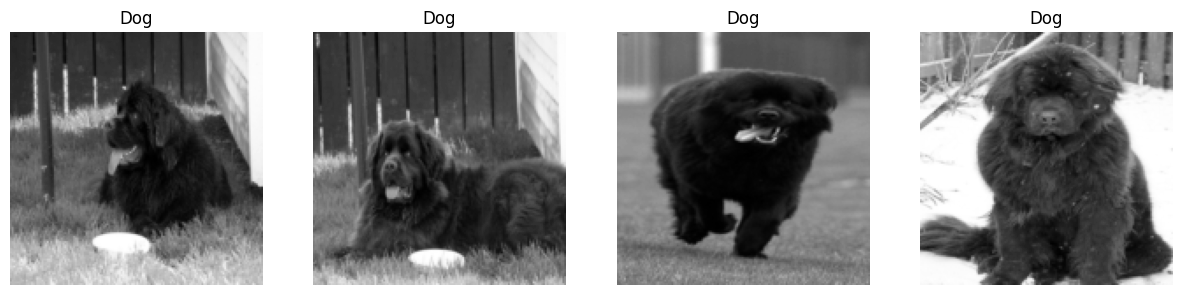

image idx  1150


KeyboardInterrupt: 

In [ ]:
N =len(dataset)
l1 = ['dog','cat']
# N = 100
N = len(new_dataset)
l1 

context_length = 4
for i in range(0,N,50):
    print("image idx ",i)
    show_images(images = [new_dataset[j][0] for j in range(i,i+context_length)] ,scale_factor = 1,titles = [l1[new_dataset[i][1]]]*context_length)
    
    

In [ ]:
raise InterruptedError

InterruptedError: 

In [ ]:
# img_dict={}
# for i in tqdm(range(len(new_dataset))):
#     label=new_dataset[i][1]
#     if(label not in img_dict):
#         img_dict[new_dataset[i][1]]=[]
#     img_dict[label].append(i)


In [ ]:
# print(img_dict)

In [ ]:
# title=[]
# images=[]
# SCALE=0.5
# for i in tqdm(img_dict):
#     for j in range(1):
#         idx=img_dict[i][j]
#         img=dataset[idx][0]
#         # label=
#         images.append(img)
#         title.append(i)
#         # title.append(idx)
    
# # show_images(images ,SCALE,title)
# for i in range(len(images)//10+1):

#     show_images(images = images[i:i+10] ,scale_factor = SCALE,titles = title[i:i+10])



    


In [ ]:
import gzip
import pickle

# Save the list to a gzipped file
# with gzip.open('binary_label_dict.gz', 'wb') as f:
#     pickle.dump(binary_label_dict, f)

# # Load the list from the gzipped file
# with gzip.open('new_labels.gz', 'rb') as f:
#     loaded_labels = pickle.load(f)

with gzip.open('classes.gz', 'rb') as f:
    loaded_labels = pickle.load(f)

# # Display the loaded list
# print("Loaded list:", loaded_list)


### EDA : Changing labels manually

In [ ]:
import gzip
import pickle

with gzip.open('classes.gz', 'rb') as f:
    loaded_labels = pickle.load(f)



In [ ]:
N =len(dataset)
l1 = ['dog','cat']
new_labels = {}
context_length = 4
for i in range(0,N,50):
    show_images(images = [dataset[j][0] for j in range(i,i+context_length)] ,scale_factor = 1,titles = None)
    # label = int(input('Enter 1 for cat, 0 for dog, -1 otherwise'))
    # binary_label_dict[i] = label
    label = loaded_labels[i]
    print(type(label))
    print(f"Current label :  {l1[label] if label!=-1 else None}")

    label = (input('Enter "y" to keep the current label, else Enter 1 for cat, 0 for dog, -1 otherwise'))
    if(label=='y'):
        print(f"{i} th image remains same as {loaded_labels[i]}")
        label = loaded_labels[i]
    else:
        label = int(label)
        print(f"{i} th image set to {l1[int(label)] if int(label)!=-1 else None}")
    if label == -1:
        print("Error at ",i)
        raise ZeroDivisionError
        
    new_labels[i] = label
    
    

In [ ]:
with gzip.open('new_labels.gz', 'wb') as f:
    pickle.dump(new_labels, f)

In [ ]:
raise IOError

ZeroDivisionError: 

### Downsampling

In [ ]:
loaded_labels

{0: 1,
 50: 0,
 100: 0,
 150: 0,
 200: 0,
 250: 1,
 300: 1,
 350: 1,
 400: 0,
 450: 1,
 500: 0,
 550: 1,
 600: 0,
 650: 0,
 700: 0,
 750: 0,
 800: 0,
 850: 0,
 900: 1,
 950: 0,
 1000: 1,
 1050: 0,
 1100: 0,
 1150: 1,
 1200: 0,
 1250: 0,
 1300: 1,
 1350: 1,
 1400: 0,
 1450: 0,
 1500: 0,
 1550: 0,
 1600: 1,
 1650: 1,
 1700: 0,
 1750: 0,
 1800: 0,
 1850: 1,
 1900: 0,
 1950: 0,
 2000: 0,
 2050: 0,
 2100: 1,
 2150: 1,
 2200: 1,
 2250: 0,
 2300: 1,
 2350: 0,
 2400: 1,
 2450: 0,
 2500: 0,
 2550: 0,
 2600: 0,
 2650: 0,
 2700: 0,
 2750: 0,
 2800: 0,
 2850: 1,
 2900: 0,
 2950: 0,
 3000: 1,
 3050: 0,
 3100: 0,
 3150: 1,
 3200: 1,
 3250: 0,
 3300: 0,
 3350: 0,
 3400: 0,
 3450: 1,
 3500: 1,
 3550: 0,
 3600: 0,
 3650: 0}

In [ ]:


import torch.nn.functional as F

def downsample_image_tensor(image_tensor, factor):
    """
    Downsample a 3D image tensor (1, H, W) by a given factor.

    Args:
        image_tensor (torch.Tensor): The input image tensor of shape (1, H, W).
        factor (int): The factor by which to downsample the image.

    Returns:
        torch.Tensor: The downsampled image tensor with shape (1, new_H, new_W).
    """
    # Ensure the input tensor is a 3D tensor of shape (1, H, W)
    if len(image_tensor.shape) != 3 or image_tensor.shape[0] != 1:
        raise ValueError("Input tensor must be a 3D tensor of shape (1, H, W).")
    
    # Add a batch dimension to the tensor
    image_tensor = image_tensor.unsqueeze(0)  # Now shape is (1, 1, H, W)

    # Calculate the new size
    new_size = (image_tensor.shape[2] // factor, image_tensor.shape[3] // factor)

    # Downsample the image using bilinear interpolation
    downsampled_image_tensor = F.interpolate(image_tensor, size=new_size, mode='bilinear', align_corners=False)

    # Remove the batch dimension
    downsampled_image_tensor = downsampled_image_tensor.squeeze(0)  # Now shape is (1, new_H, new_W)

    return downsampled_image_tensor


#hyperparameter
factor=2

# downsampledImage=downsample_image_tensor(tensor,factor)
# print(downsampledImage)

# show_images(images = [img, tensor,] ,scale_factor = SCALE,titles = ['original', 'grayscale'])


# # Example usage
# image_tensor = torch.randn(1, 256, 256)  # Example image tensor of shape (1, H, W)
# factor = 2

# downsampled_image_tensor = downsample_image_tensor(image_tensor, factor)
# print(downsampled_image_tensor.shape)  # Output shape should be (1, 128, 128)


In [ ]:
old_dataset = new_dataset.copy()
old_dataset[0][0].shape

torch.Size([1, 144, 144])

In [ ]:
factor = 2
new_dataset=old_dataset.copy()
for i in range(len(new_dataset)):
    # newTensor=new_dataset[i][0]
    new_dataset[i] = (downsample_image_tensor(new_dataset[i][0],2),new_dataset[i][1])

new_dataset[0][0].shape



torch.Size([1, 72, 72])

In [ ]:
raise SectionEndError

NameError: name 'SectionEndError' is not defined

### Patch Images

- The following is mainly from the above implementations (not my code)

In [ ]:
from torch import nn
from einops.layers.torch import Rearrange
from torch import Tensor


class PatchEmbedding(nn.Module):
    def __init__(self, in_channels = 3, patch_size = 8, emb_size = 128):
        self.patch_size = patch_size
        super().__init__()
        self.projection = nn.Sequential(
            # break-down the image in s1 x s2 patches and flat them
            Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=patch_size, p2=patch_size),
            nn.Linear(patch_size * patch_size * in_channels, emb_size)
        )

    def forward(self, x: Tensor) -> Tensor:
        x = self.projection(x)
        return x

# Run a quick test

sample_datapoint = torch.unsqueeze(new_dataset[0][0], 0)
print("Initial shape: ", sample_datapoint.shape)
embedding = PatchEmbedding(1,1,144)(sample_datapoint)
print("Patches shape: ", embedding.shape)

Initial shape:  torch.Size([1, 1, 72, 72])
Patches shape:  torch.Size([1, 5184, 144])


## Model

Let's first implement all of the transformer building blocks. These blocks are inspired by the implementations linked above. I've left out some dropouts and normalizations at some places.

In [ ]:
from einops import rearrange

class Attention(nn.Module):
    def __init__(self, dim, n_heads, dropout):
        super().__init__()
        self.n_heads = n_heads
        self.att = torch.nn.MultiheadAttention(embed_dim=dim,
                                               num_heads=n_heads,
                                               dropout=dropout)
        self.q = torch.nn.Linear(dim, dim)
        self.k = torch.nn.Linear(dim, dim)
        self.v = torch.nn.Linear(dim, dim)

    def forward(self, x):
        q = self.q(x)
        k = self.k(x)
        v = self.v(x)
        attn_output, attn_output_weights = self.att(x, x, x)
        return attn_output

In [ ]:
Attention(dim=128, n_heads=4, dropout=0.)(torch.ones((1, 5, 128))).shape

torch.Size([1, 5, 128])

In [ ]:
class PreNorm(nn.Module):
    def __init__(self, dim, fn):
        super().__init__()
        self.norm = nn.LayerNorm(dim)
        self.fn = fn
    def forward(self, x, **kwargs):
        return self.fn(self.norm(x), **kwargs)

In [ ]:
norm = PreNorm(128, Attention(dim=128, n_heads=4, dropout=0.))
norm(torch.ones((1, 5, 128))).shape

torch.Size([1, 5, 128])

In [ ]:
class FeedForward(nn.Sequential):
    def __init__(self, dim, hidden_dim, dropout = 0.):
        super().__init__(
            nn.Linear(dim, hidden_dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, dim),
            nn.Dropout(dropout)
        )
ff = FeedForward(dim=128, hidden_dim=256)
ff(torch.ones((1, 5, 128))).shape

torch.Size([1, 5, 128])

In [ ]:
class ResidualAdd(nn.Module):
    # skip level
    def __init__(self, fn):
        super().__init__()
        self.fn = fn

    def forward(self, x, **kwargs):
        res = x
        x = self.fn(x, **kwargs)
        x += res
        return x

In [ ]:
residual_att = ResidualAdd(Attention(dim=128, n_heads=4, dropout=0.))
residual_att(torch.ones((1, 5, 128))).shape

torch.Size([1, 5, 128])

- Not all parameters are like in the original implementation
- Some Dropouts & Norms are missing

In [ ]:
from einops import repeat

class ViT(nn.Module):
    def __init__(self, ch=1, img_size=144, patch_size=4, emb_dim=32,
                n_layers=6, out_dim=37, dropout=0.1, heads=2):
        super(ViT, self).__init__()

        # Attributes
        self.channels = ch
        self.height = img_size
        self.width = img_size
        self.patch_size = patch_size
        self.n_layers = n_layers
        
        # Patching
        
        self.patch_embedding = PatchEmbedding(in_channels=ch,
                                              patch_size=patch_size,
                                              emb_size=emb_dim)
        # Learnable params
        num_patches = (img_size // patch_size) ** 2
        self.pos_embedding = nn.Parameter(
            torch.randn(1, num_patches + 1, emb_dim))
        self.cls_token = nn.Parameter(torch.rand(1, 1, emb_dim))

        # Transformer Encoder
        self.layers = nn.ModuleList([])
        for _ in range(n_layers):
            transformer_block = nn.Sequential(
                ResidualAdd(PreNorm(emb_dim, Attention(emb_dim, n_heads = heads, dropout = dropout))),
                
                ResidualAdd(PreNorm(emb_dim, FeedForward(emb_dim, emb_dim, dropout = dropout))))
            self.layers.append(transformer_block)

        # Classification head
        self.head = nn.Sequential(nn.LayerNorm(emb_dim), nn.Linear(emb_dim, out_dim))


    def forward(self, img):
        # Get patch embedding vectors

       
        x = self.patch_embedding(img)
        b, n, _ = x.shape

        # Add cls token to inputs
        cls_tokens = repeat(self.cls_token, '1 1 d -> b 1 d', b = b)
        x = torch.cat([cls_tokens, x], dim=1)
        x += self.pos_embedding[:, :(n + 1)]

        # Transformer layers
        for i in range(self.n_layers):
            x = self.layers[i](x)

        # Output based on classification token
        return self.head(x[:, 0, :])

channels=1
patchsize=4
imgsize=144
emb_dim=32
# channels=3
# patchsize=4
# imgsize=144
# model = ViT()
# model = ViT(channels,patchsize,imgsize)
model = ViT(channels,imgsize,patchsize,emb_dim)
print(model)
model(torch.ones((1, 1, 144, 144)))


ViT(
  (patch_embedding): PatchEmbedding(
    (projection): Sequential(
      (0): Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=4, p2=4)
      (1): Linear(in_features=16, out_features=32, bias=True)
    )
  )
  (layers): ModuleList(
    (0-5): 6 x Sequential(
      (0): ResidualAdd(
        (fn): PreNorm(
          (norm): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
          (fn): Attention(
            (att): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=32, out_features=32, bias=True)
            )
            (q): Linear(in_features=32, out_features=32, bias=True)
            (k): Linear(in_features=32, out_features=32, bias=True)
            (v): Linear(in_features=32, out_features=32, bias=True)
          )
        )
      )
      (1): ResidualAdd(
        (fn): PreNorm(
          (norm): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
          (fn): FeedForward(
            (0): Linear(in_features=32, out_featu

tensor([[-1.7242,  0.1506, -0.0591, -0.4353,  0.7940,  0.0549, -0.0112,  0.2487,
          0.0500,  0.1748, -0.8868, -0.7361, -0.4487,  0.5879, -0.0633,  0.3830,
          0.7092, -0.1846,  0.3302,  0.2282, -0.3208, -0.0445,  0.3536,  0.3433,
          0.5130,  0.9388,  0.0784, -0.0448, -0.3844, -0.1235, -1.0668, -0.1992,
          0.7074, -0.2129, -0.5857,  0.2011,  0.2818]],
       grad_fn=<AddmmBackward0>)

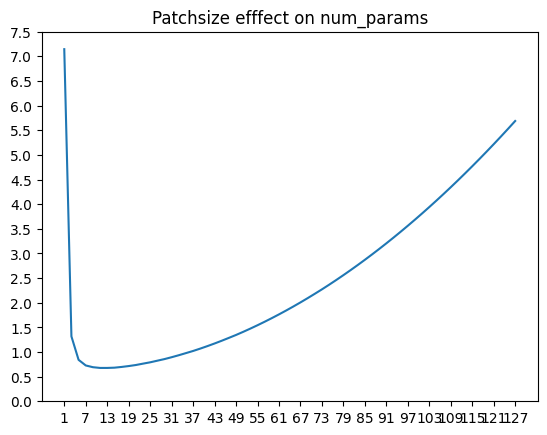

In [ ]:
# EDA block patchsize vs num_params
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x =list( np.arange(1,128,2))
y = list()
for i in x:
    model = ViT(patch_size=i).to(device)
    p = model
    num_params = sum(p.numel() for p in model.parameters() if p.requires_grad) / 101157
    y.append(num_params)

plt.plot(x,y)
plt.xticks(ticks=np.arange(1,128,6))
plt.yticks(ticks=np.arange(0,8,0.5))
plt.title("Patchsize efffect on num_params")
plt.show()

### Data splitting

In [30]:
from torch.utils.data import DataLoader
from torch.utils.data import random_split

# data = new_dataset
data = dataset


train_split = int(0.8 * len(data))
train, test = random_split(data, [train_split, len(data) - train_split])

train_dataloader = DataLoader(train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test, batch_size=32, shuffle=True)

In [ ]:
# functions : 
from sklearn.metrics import roc_auc_score
import torch

def roc_auc(logits, labels):
    """
    Compute the ROC AUC score.

    Args:
        logits (torch.Tensor or np.ndarray): The raw predictions (logits) from the model. 
                                             Should be of shape (num_samples, num_classes).
        labels (torch.Tensor or np.ndarray): The true labels. Should be of shape (num_samples, num_classes).

    Returns:
        float: The ROC AUC score.
    """

    if len(labels.shape)==2:
        labels = labels.squeeze()
        # print("shape is ",labels.shape)
        
    # Convert logits to probabilities using sigmoid for binary classification
    # if logits.ndim == 2 and logits.shape[1] == 2:  # Binary classification
    #     probs = torch.softmax(logits, dim=1)[:, 1]  # Get probabilities for the positive class
    # elif logits.ndim == 1:  # If logits is already a 1D tensor (e.g., for binary classification with single output)
    #     probs = torch.sigmoid(logits)
    # else:
    #     raise ValueError("Invalid shape for logits")
    
    probs = torch.sigmoid(logits)

    # Convert to numpy arrays if needed
    probs = probs.detach().numpy() if torch.is_tensor(probs) else probs
    labels = labels.detach().numpy() if torch.is_tensor(labels) else labels

    # Calculate ROC AUC score
    auc_score = roc_auc_score(labels, probs)
    return auc_score

# Example usage
# test_pred = model(test_data)  # Logits from your model
# y_test = true_labels  # True labels
# test_auc = roc_auc(test_pred, y_test)
# print(f"ROC AUC Score: {test_auc}")


In [ ]:
raise Zer

NameError: name 'Zer' is not defined

In [ ]:
parameters : 
ppos_embed
cls_token
patch_embed : weight, bias
each layer has 2 sublayers:
    attention : 
    Feedforward : norm & 

In [ ]:
def gradient_display(epoch):
    with open("gradients.txt", "w") as f:
        f.write(f'Gradients at Epoch : {epoch} are')
        f.write('\n')
        for name, param in model.named_parameters():
            if param.grad is not None:
            # print(f"Layer: {name}, Gradient: {param.grad}")
                f.write(f"Layer: {name}, Gradient: {param.grad}\n")
        f.write("-------------------------------------------------------------------------------------")
        f.write("\n\n\n")
        # f.write("-------------------------------------------------------------------------------------")
    
    
            

### EDA : Exploring gradients and parameters

In [ ]:
# del
# model = ViT(heads=8, n_layers = 1)
l1  = list(model.named_parameters())

In [ ]:
len(l1)

44

In [ ]:
n = 6
name, x = l1[n]

In [ ]:
list(x.shape)

[12, 4]

In [ ]:
type(x)

torch.nn.parameter.Parameter

In [ ]:
s

0

In [ ]:
s = 0
for i,l2 in enumerate(l1):
    print(i, ' ' if i<10 else '', l2[0], (40 - len(l2[0]))*' ', '|', list(l2[1].shape), l2[1].grad is not None)
    # s = max(s,len(l2[0]))

0   pos_embedding                             | [1, 325, 4] True
1   cls_token                                 | [1, 1, 4] True
2   patch_embedding.projection.1.weight       | [4, 64] True
3   patch_embedding.projection.1.bias         | [4] True
4   layers.0.0.fn.norm.weight                 | [4] True
5   layers.0.0.fn.norm.bias                   | [4] True
6   layers.0.0.fn.fn.att.in_proj_weight       | [12, 4] True
7   layers.0.0.fn.fn.att.in_proj_bias         | [12] True
8   layers.0.0.fn.fn.att.out_proj.weight      | [4, 4] True
9   layers.0.0.fn.fn.att.out_proj.bias        | [4] True
10  layers.0.0.fn.fn.q.weight                 | [4, 4] False
11  layers.0.0.fn.fn.q.bias                   | [4] False
12  layers.0.0.fn.fn.k.weight                 | [4, 4] False
13  layers.0.0.fn.fn.k.bias                   | [4] False
14  layers.0.0.fn.fn.v.weight                 | [4, 4] False
15  layers.0.0.fn.fn.v.bias                   | [4] False
16  layers.0.1.fn.norm.weight                 |

In [ ]:
list of 
43 entries
(name, tensor, shape, param.grad is not none, gradient tensor, gradient shape, )

In [ ]:
raise End EDA

SyntaxError: invalid syntax (962449222.py, line 1)

### Pretrained Model 

In [23]:
# Load model directly
from transformers import AutoImageProcessor, AutoModelForImageClassification

processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224")

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


### Training

In [25]:
# hyperparameters tk hyper
max_iters = 1
eval_interval = 2
lr = 0.001

params = {
    'ch': 1,
    'img_size': 144,
    'patch_size': 8,
    'emb_dim': 4,
    'n_layers': 2,
    'out_dim': 1,
    'dropout': 0.5,
    'heads': 2
}

# ---------------------

import torch.optim as optim
import numpy as np
from tqdm import tqdm
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using device: {device} | Total epochs : {max_iters}")
# model = ViT(**params).to(device)

optimizer = optim.AdamW(model.parameters(), lr=lr)
criterion = nn.BCEWithLogitsLoss()
# criterion = nn.CrossEntropyLoss()


# for epoch in range(1000):
for epoch in (range(1,max_iters + 1)):
    epoch_losses = []
    model.train()
    eval_flag = ( epoch % eval_interval == 0 or epoch == max_iters - 1)
    
    for step, (inputs, labels) in enumerate(train_dataloader):
        if len(labels.shape)==1:
            labels = labels.reshape(-1, 1).to(dtype=torch.float32)
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        if eval_flag:
            epoch_losses.append(loss.detach().item())
            # train_acc = roc_auc(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        gradient_display(epoch)
        optimizer.step()
        break
        

        


    if eval_flag:
        model.eval()
        with torch.inference_mode():
        
            train_loss =  np.mean(epoch_losses)
            epoch_losses = []
            total = 0
            correct = 0
            model.eval()
            for step, (inputs, labels) in enumerate(test_dataloader):
                if len(labels.shape)==1:
                    labels = labels.reshape(-1, 1).to(dtype=torch.float32)
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                epoch_losses.append(loss.detach().item())


                # Get the predicted classes
                _, predicted = torch.max(outputs, 1)

                # Update the total number of samples
                total += labels.size(0)

                # Update the number of correct predictions
                correct += (predicted == labels.squeeze()).sum().item()

            test_loss =  np.mean(epoch_losses)
            test_acc = correct / total
            # print(f'Accuracy: {accuracy*100:.2f}')

            # train_acc = roc_auc(outputs, labels)
            print(f"Epoch: {epoch}  | Train Loss : {train_loss:.5f}  | Test Loss:  {test_loss:.5f} | Test Accuracy : {test_acc*100:.3f} % ")
        # print(f"step {epoch}: train loss {train_loss:.4f}, test loss {test_loss:.4f}")


Using device: cpu | Total epochs : 1


NameError: name 'nn' is not defined

In [31]:
with torch.inference_mode():
        
            # train_loss =  np.mean(epoch_losses)
            epoch_losses = []
            total = 0
            # correct = 0
            model.eval()
            for step, (inputs, labels) in enumerate(test_dataloader):
                if len(labels.shape)==1:
                    labels = labels.reshape(-1, 1).to(dtype=torch.float32)
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                epoch_losses.append(loss.detach().item())


                # Get the predicted classes
                _, predicted = torch.max(outputs, 1)

                # Update the total number of samples
                total += labels.size(0)

                # Update the number of correct predictions
                correct += (predicted == labels.squeeze()).sum().item()

            test_loss =  np.mean(epoch_losses)
            test_acc = correct / total
            # print(f'Accuracy: {accuracy*100:.2f}')

            # train_acc = roc_auc(outputs, labels)
            print(f"Epoch: {epoch}  | Train Loss : {train_loss:.5f}  | Test Loss:  {test_loss:.5f} | Test Accuracy : {test_acc*100:.3f} % ")
        # print(f"step {epoch}: train loss {train_loss:.4f}, test loss {test_loss:.4f}")

ValueError: Input image size (144*144) doesn't match model (224*224).

In [ ]:
labels.shape

torch.Size([32, 1])

In [ ]:
loss is None

False

In [ ]:
outputs.dtype

torch.float32

In [ ]:
labels.dtype

torch.float32

In [ ]:
labels

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.]])

In [ ]:
labels.shape

torch.Size([32, 1])

In [ ]:
for step, (inputs, labels) in enumerate(train_dataloader):
    print(inputs.shape)

torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size

In [ ]:
inputs, labels = next(iter(test_dataloader))
inputs, labels = inputs.to(device), labels.to(device)
outputs = model(inputs)

print("Predicted classes", outputs.argmax(-1))
print("Actual classes", labels)

Predicted classes tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])
Actual classes tensor([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 1])


In [ ]:

import torch

# Assuming you have already defined `test_dataloader` and `model`

# Move model to the correct device
model.to(device)

# Set model to evaluation mode
model.eval()

# Initialize variables to track the total and correct predictions
total = 0
correct = 0
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)

        # Get the predicted classes
        _, predicted = torch.max(outputs, 1)

        # Update the total number of samples
        total += labels.size(0)

        # Update the number of correct predictions
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = correct / total

print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 69.57


This needs to train much longer :)